In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [65]:
df = pd.read_csv('train.csv',engine='c',memory_map=True,nrows=10000)

In [66]:
# Pour avoir facilement le nom des colonnes
print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [67]:
# On sauvegarde la colonne pickup_datetime
datetime = pd.to_datetime(df.pickup_datetime)
# On supprime toutes les colonnes potentiellement innutiles
dfPreprocessed = df.drop(['id', 'vendor_id','store_and_fwd_flag','pickup_datetime','dropoff_datetime'],axis=1)

# On reccréer des colonnes en utilisant les infos de la date afin d'augmenter le nombre de données
dfPreprocessed['hour'] = datetime.dt.hour
dfPreprocessed['minute'] = datetime.dt.minute
dfPreprocessed['second'] = datetime.dt.second
dfPreprocessed['dayOfWeek'] = datetime.dt.dayofweek
dfPreprocessed['weekOfYear'] = datetime.dt.weekofyear
dfPreprocessed['dayOfYear'] = datetime.dt.dayofyear

# On sépare les données en deux : les données qui seront en entrée de l'algorithme (X) et les données en sortie (Y)
X = dfPreprocessed.loc[:,dfPreprocessed.columns != 'trip_duration']
Y = dfPreprocessed.trip_duration

# On créé les données d'entraînement et de test
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,train_size=.85,random_state=19061996)

In [104]:
# Fonction qui va retourner l'erreur d'un model et qui permet de faire varier la profondeur des arbres ou bien le nombre d'abre dans la forêt
def getMae(estimator, depth):
    model = RandomForestRegressor(random_state=19061996, n_estimators=estimator, max_depth=depth).fit(XTrain,YTrain)
    return (mean_absolute_error(YTest, model.predict(XTest)))

In [105]:
# On regarde comment faire varier le nombre d'arbres dans la forêt influence l'erreur. La profondeur d'un arbre est choisis arbitrairement
estimators = [1,2,5,10,15,20,30,40,50]
maeEstimators = []
for e in estimators:
    print('running:',e)
    maeEstimators.append(getMae(e,5))
print('end')

running: 1
running: 2
running: 5
running: 10
running: 15
running: 20
running: 30
running: 40
running: 50
end


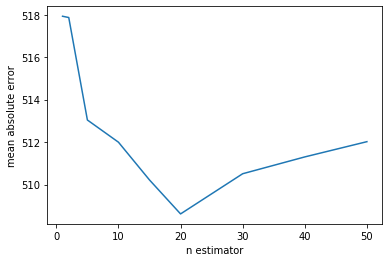

In [106]:
plt.plot(estimators,maeEstimators)
plt.xlabel('n estimator')
plt.ylabel('mean absolute error')
plt.show()

In [107]:
# On regarde comment faire varier la profondeur des arbres influence l'erreur. Le nombre d'arbres dans une forêt est choisit arbitrairement (en vrai j'ai quand même essaillé de prendre la valeur qui minimise l'erreur)
depths = [1,2,5,10,15,20,30,40,50]
maeDepths = []
for d in depths:
    print('running:',d)
    maeDepths.append(getMae(20,d))
print('end')

running: 1
running: 2
running: 5
running: 10
running: 15
running: 20
running: 30
running: 40
running: 50
end


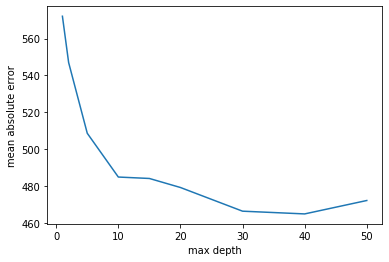

In [108]:
plt.plot(depths,maeDepths)
plt.xlabel('max depth')
plt.ylabel('mean absolute error')
plt.show()

In [109]:
# On regarde le résultat si on fait un modèle qui prend les paramètres qui minismes les deux erreurs. Il est possible que l'on puisse avoir des erreurs encore plus faible en augmentant les paramètres, mais les temps de calculs commencent à être assez long, donc il est aussi possible qu'il faille prendre un autre modèle
getMae(20,40)

464.8240572036059